# Common

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function
print('print function is ready to serve')

# NumPy for numerical computing
import numpy as np
np.random.seed(123)

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_column', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc

import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import SGD

print function is ready to serve


Using TensorFlow backend.


In [2]:
import os
from skimage import io

PLANET_KAGGLE_ROOT = '/Users/jiayou/Documents/Kaggle Data/Amazon'

def load_image(filename):
    '''Look through the directory tree to find the image you specified
    (e.g. train_10.tif vs. train_10.jpg)'''
    for dirname in os.listdir(PLANET_KAGGLE_ROOT):
        path = os.path.abspath(os.path.join(PLANET_KAGGLE_ROOT, dirname, filename))
        if os.path.exists(path):
            print('Found image {}'.format(path))
            return io.imread(path)
    # if you reach this line, you didn't find the image you're looking for
    print('Load failed: could not find image {}'.format(path))

def load_train_image(n, dbg=False):
    path = os.path.abspath(os.path.join(PLANET_KAGGLE_ROOT, 'train-jpg', 'train_{}.jpg'.format(n)))
    if os.path.exists(path):
        img = io.imread(path)
        if dbg:
            plt.figure()
            plt.imshow(img)
        return img
    # if you reach this line, you didn't find the image you're looking for
    print('Load failed: could not find image {}'.format(path))

def load_test_image(n):
    path = os.path.abspath(os.path.join(PLANET_KAGGLE_ROOT, 'test-jpg', 'test_{}.jpg'.format(n)))
    if os.path.exists(path):
        return io.imread(path)
    # if you reach this line, you didn't find the image you're looking for
    print('Load failed: could not find image {}'.format(path))
        

In [3]:
# img = load_train_image(1)
# plt.imshow(img)
# img.shape

In [7]:
train_labels = pd.read_csv(os.path.join(PLANET_KAGGLE_ROOT, 'train_v2.csv'))
train_labels

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [8]:
N_TAGS = 17
# label_map = {
#     'clear':0,
#     'partly_cloudy':1,
#     'haze':2,
#     'cloudy':3
# }
# label_idx = {v: k for k, v in label_map.items()}

Build list with unique labels
label_list = []
for tag_str in train_labels.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

label_map = {}
for i in range(len(label_list)):
    label_map[label_list[i]] = i
label_idx = {v: k for k, v in label_map.items()}

weather_labels = [0, 3, 9, 10]

def pred_to_tags(y):
    maxw = 0
    tags = []
    for i in range(N_TAGS):
        tag = label_idx[i]
        if i in weather_labels:
            if y[i] > maxw:
                tags.append(tag)
                maxw = y[i]
        else:
            if y[i] >= 0.5:
                tags.append(tag)
    if maxw < 1e-6:
        tags.append('clear')
    return ' '.join(tags)

label_idx

{0: 'clear', 1: 'partly_cloudy', 2: 'haze', 3: 'cloudy'}

In [9]:
def get_training_data(file_ids, dbg=False):
    X_train = np.array([np.array(load_train_image(fname, dbg)) for fname in file_ids])
    X_train = X_train.astype('float32')
    X_train = X_train / 255 - 0.5
    
#     file_names = ['train_{}'.format(n) for n in file_ids]
#     train_labels = pd.read_csv(os.path.join(PLANET_KAGGLE_ROOT, 'train_v2.csv'))
#     cond = train_labels.image_name.apply(lambda x: True if x in file_names else False).tolist()
#     train_labels = train_labels[cond]
    
    y_train = np.array([[0. for i in range(N_TAGS)] for j in file_ids])
    for i in range(len(file_ids)):
        tags = train_labels.tags[file_ids[i]]
        if dbg:
            print(file_ids[i], tags)
        for tag in tags.split(' '):
            if not tag in label_map:
                continue
            y_train[i][label_map[tag]] = 1.
    if dbg:
        print(y_train)
    
    return (X_train, y_train)

def get_test_data(file_ids):
    X_train = np.array([np.array(load_test_image(fname)) for fname in file_ids])
    X_train = X_train.astype('float32')
    X_train = X_train / 255 - 0.5
    return X_train

N_TRAIN = 40479
N_USE = 32000
# N_USE = 20
# N_TEST_T = 40669
# N_TEST_F = 20522
# N_TEST_BATCH_SIZE = 1224
# N_TEST_STEPS = 1224

def gen_training_data(batch_size, dbg=False):
    while 1:
        file_ids = np.random.randint(0, N_USE, size=batch_size).tolist()
        file_ids.sort()
        if dbg:
            print('file ids: ', file_ids)
        yield get_training_data(file_ids, dbg)


def gen_validation_data(batch_size):
    while 1:
        file_ids = np.random.randint(N_USE, N_TRAIN, size=batch_size).tolist()
        file_ids.sort()
        yield get_training_data(file_ids)
        
def gen_test_data():
    batch_size = N_TEST_BATCH_SIZE
    pass

file ids:  [9, 15]
9 agriculture clear cultivation primary road
15 clear primary
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]]


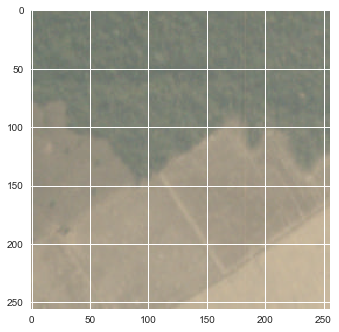

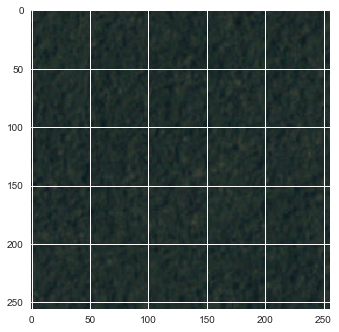

In [14]:
# g = gen_training_data(2, True)
# t = next(g)

In [18]:
def amazon_score(y_true, y_pred):
    y_true = y_true > 0.2
    y_pred = y_pred > 0.2
    
    y_tp = tf.logical_and(y_true, y_pred)
    y_fn = tf.logical_and(y_true, tf.logical_not(y_pred))
    y_fp = tf.logical_and(tf.logical_not(y_true), y_pred)
    
    tp = tf.reduce_sum(tf.to_float(y_tp))
    fn = tf.reduce_sum(tf.to_float(y_fn))
    fp = tf.reduce_sum(tf.to_float(y_fp))
    
    p = tf.where(tp + fp > 0, tp / (tp + fp), 0)
    r = tf.where(tp + fn > 0, tp / (tp + fn), 1)
    s = tf.where(p + r > 0, 5 * p * r / (4 * p + r), 0)
    
    return s

In [43]:
def new_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(256, 256, 3)))

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(N_TAGS, activation='sigmoid'))

    model.compile(metrics=[amazon_score, 'accuracy'],
                  loss='binary_crossentropy',
                  optimizer=Adam(lr=0.001))
    return model

def load_model(path):
    model = new_model()
    model.load_weights(path)
    return model

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input
from keras.models import Model

import numpy as np

def new_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor = Input(shape=(256, 256, 3)))
    
    # add a global spatial average pooling layer
    x = base_model.output
    x = Flatten()(x)
    # let's add a fully-connected layer
    x = Dense(256, activation='relu')(x)
    # and a logistic layer -- let's say we have 200 classes
    predictions = Dense(17, activation='sigmoid')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # first: train only the top layers (which were randomly initialized)
#     for layer in base_model.layers:
#         layer.trainable = False
        
#     for layer in model.layers[-24:]:
#         layer.trainable = True

    model.compile(metrics=[amazon_score, 'accuracy'],
                  loss='binary_crossentropy',
                  optimizer=Adam(lr=0.001))
    return model

# Training

In [44]:
X_train, y_train = get_training_data([
    10856, 35105, 10421, 15999, 37381, 
    26157, 25945, 5195, 17380, 18042,
    28374, 31971, 27748, 19283, 24197,
    23567, 19779, 17303, 27781, 20267
])

In [45]:
# model = new_model()
# model = load_model('/Users/jiayou/weights-v1.02-0.60-0.10.hdf5')
model = new_resnet50()

In [46]:
h = model.fit_generator(
        gen_training_data(30), steps_per_epoch=1000, 
        epochs=3, initial_epoch=0,
        validation_data=gen_validation_data(100), validation_steps=80,
        callbacks=[
            ModelCheckpoint('weights-v1.{epoch:02d}-{val_amazon_score:.2f}-{val_loss:.2f}.hdf5'),
            ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1)],
        max_q_size=2)

# h = model.fit_generator(
#         gen_training_data(1), steps_per_epoch=20,
#         epochs=50, initial_epoch=0,
#         validation_data=gen_validation_data(10), validation_steps=1,
#         callbacks=[ModelCheckpoint('weights-v1.{epoch:02d}-{val_amazon_score:.2f}-{val_loss:.2f}.hdf5')],
#         max_q_size=2)

# h = model.fit(
#     X_train, y_train, batch_size=1, epochs=50, verbose=1,
#     validation_data=(X_train, y_train),
#     callbacks=[ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, verbose=1)]
# )

# h = model.fit(X_train, y_train, batch_size=10, epochs=12, verbose=1, initial_epoch=10)

Epoch 1/50
20/20 [==============================] - 12s - loss: 0.7988 - amazon_score: 0.5565     

# Prediction

In [22]:
# model.evaluate(X_test, y_test)

In [23]:
# model.model.history.history

In [36]:
model = load_model('/Users/jiayou/weights-v1.02-0.60-0.10.hdf5')

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 32)        0         
__________

In [47]:
# X_test, y_test = next(gen_validation_data(20))
X_test, y_test = X_train, y_train

In [48]:
prediction = model.predict(X_test)
np.floor(prediction + 0.5).astype('int32')
(prediction * 10).astype('int32').astype('float') / 10

array([[ 0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  1. ],
       [ 0.4,  0.2,  0.4,  0. ],
       [ 0.4,  0. ,  0.2,  0. ],
       [ 0.4,  0.2,  0.4,  0. ],
       [ 0.4,  0.3,  0.4,  0.1],
       [ 0.4,  0.2,  0.4,  0. ],
       [ 0.4,  0.3,  0.4,  0. ],
       [ 0.4,  0.2,  0.4,  0. ],
       [ 0.4,  0.3,  0.4,  0. ],
       [ 0.4,  0.3,  0.4,  0. ],
       [ 0.2,  0.4,  0.2,  0.2],
       [ 0. ,  0.4,  0. ,  0. ],
       [ 0. ,  0.3,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.3],
       [ 0.4,  0.2,  0.4,  0. ],
       [ 0. ,  0.1,  0. ,  0.7]])

In [34]:
y_test.astype('int32')

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=int32)

In [53]:
c = np.concatenate((y_test.astype('int32'), y_test.astype('int32')))
[0]+[9]

[0, 9]

In [67]:
prediction[0]

array([ 0.        ,  0.89745963,  0.        ,  0.81231612,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [70]:
[pred_to_tags(x) for x in prediction]

['primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear',
 'primary clear']

In [54]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D) (None, 262, 262, 3)   0           input_5[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 128, 128, 64)  9472        zero_padding2d_5[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 128, 128, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________